<a href="https://colab.research.google.com/github/nilesh0109/ML_SoSe19/blob/master/Copy_of_ML_ex06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# UNIVARIATE GAUSSIAN

In [3]:
np.random.seed(2)
data_points_to_draw = 100
mu, sigma, data_points = [-2, -7, 10], [3, 0.9, 2], []
for i in range(3):
  normal_data_points = np.random.normal(mu[i], sigma[i], (data_points_to_draw,1))
  if i ==2:
    data_points.append(normal_data_points[:50])
  else:
    data_points.append(normal_data_points)
print(mu, sigma)
#print(data_points)

[-2, -7, 10] [3, 0.9, 2]


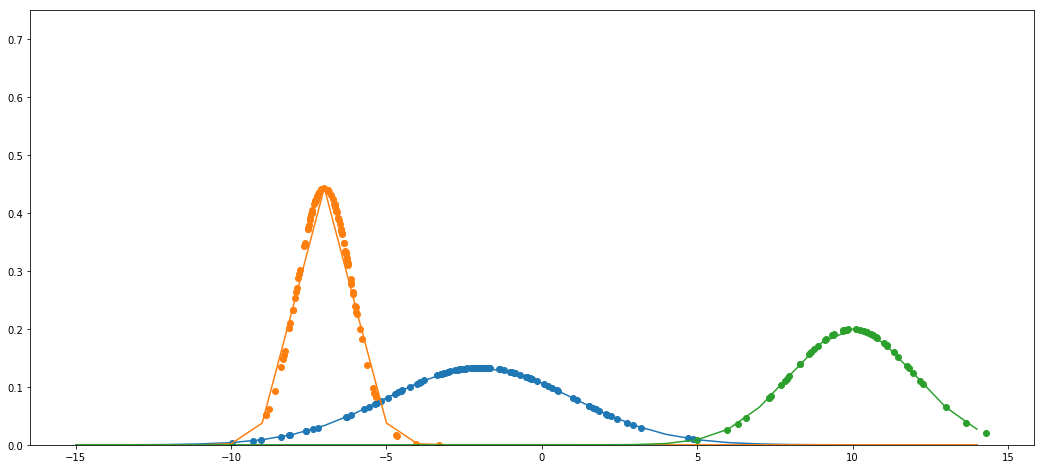

In [4]:
def getGaussian_pdf(pos, mu, sigma):
  temp = -0.5 * ((pos - mu) / sigma) ** 2
  return np.exp(temp) / (sigma * np.sqrt(2 * np.pi))

_,ax = plt.subplots(1,1, figsize=(18, 8))
for i in range(3):
  y=getGaussian_pdf(np.arange(-15,15), mu[i], sigma[i])
  ax.plot(np.arange(-15,15), y)
  ax.scatter(data_points[i], getGaussian_pdf(data_points[i], mu[i], sigma[i]))
ax.set_ylim(0,0.75)
plt.show()

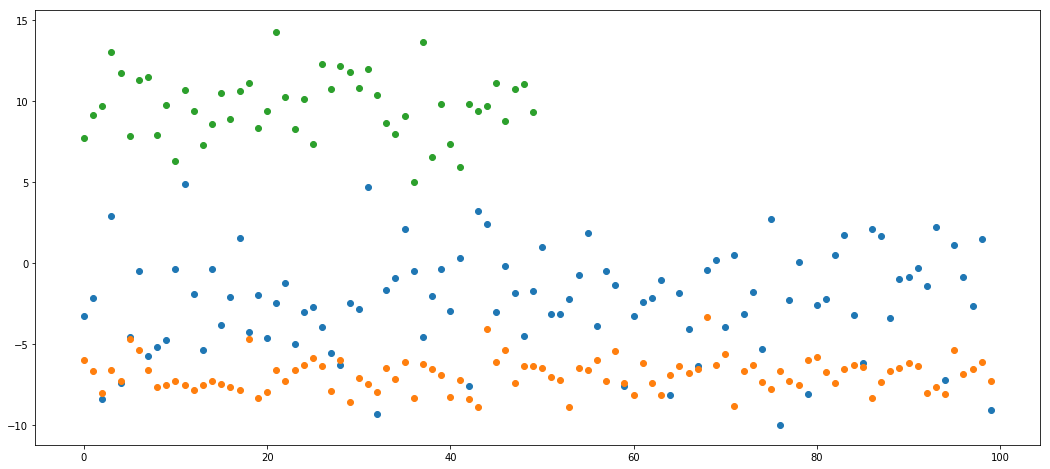

In [5]:
_,ax = plt.subplots(1,1, figsize=(18, 8))
for dataset in data_points:
  ax.scatter(np.arange(len(dataset)),dataset)
plt.show()

In [0]:
test_data_points = np.concatenate((data_points[0], data_points[1], data_points[2]), axis=None)

# EXPECTATION_MAXIMIZATION

In [0]:
'''

GMM Class with parameters as k weights(alpha), k mean(mu),k covarinace(sigma)
'''
class GMM:
  def __init__(self, num_gaussians, num_iterations):
    self.num_gaussians = num_gaussians
    self.num_iterations = num_iterations
    
    
  def Expectation_step(self):
    NUM_DATAPOINTS, NUM_GAUSSIANS = self.r.shape
    #calculate respossibility matrix r_ik
    for i in range(NUM_DATAPOINTS):
      for k in range(NUM_GAUSSIANS):
        self.r[i,k] =self.alpha[k] * getGaussian_pdf(self.datapoints[i], self.mu[k], self.sigma[k])
      self.r[i,:] /= self.r[i,:].sum()
        
  def Minimiztion_step(self):
    n_k = self.r.sum(axis=0)
    self.alpha = n_k / self.datapoints.shape[0]
    mu_temp = self.r * self.datapoints[:, np.newaxis]
    self.mu = mu_temp.sum(axis=0) / n_k
    sigma_temp = self.r * (np.column_stack((self.datapoints, self.datapoints, self.datapoints)) - self.mu) ** 2
    self.sigma = np.sqrt(sigma_temp.sum(axis=0) / n_k)
    
  def fit(self, data_points):
    np.random.seed(2)
    self.num_datapoints = len(data_points)
    self.datapoints = data_points
    
    self.r = np.zeros((self.num_datapoints, self.num_gaussians))
    self.alpha = [1/ self.num_gaussians] *  self.num_gaussians
    random_mu_index = np.random.choice(self.num_datapoints, self.num_gaussians, replace=False)
    self.mu = self.datapoints[random_mu_index]
    self.sigma = [np.std(self.datapoints)] * self.num_gaussians
    
    print('initial values are', self.alpha)
    print(self.mu, self.sigma)
    
    for i in range(self.num_iterations):
      self.Expectation_step()
      self.Minimiztion_step()
    

In [8]:
model = GMM(3, 1000)

model.fit(test_data_points)
print('final values are')
print(model.alpha)
print(model.mu)
print(model.sigma)

initial values are [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
[-0.94733452 -0.30117368  2.22008872] [6.4741187253625885, 6.4741187253625885, 6.4741187253625885]
final values are
[0.40790802 0.39221608 0.1998759 ]
[-7.04433975 -2.04315849  9.68734359]
[0.95731549 2.83311368 1.97376446]


# MULTIVARIATE GAUSSIAN DISTRIBUTION

In [0]:
from scipy.stats import multivariate_normal

In [10]:
import matplotlib.cm
matplotlib.cm.cmap_d.keys()

dict_keys(['Blues', 'BrBG', 'BuGn', 'BuPu', 'CMRmap', 'GnBu', 'Greens', 'Greys', 'OrRd', 'Oranges', 'PRGn', 'PiYG', 'PuBu', 'PuBuGn', 'PuOr', 'PuRd', 'Purples', 'RdBu', 'RdGy', 'RdPu', 'RdYlBu', 'RdYlGn', 'Reds', 'Spectral', 'Wistia', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd', 'afmhot', 'autumn', 'binary', 'bone', 'brg', 'bwr', 'cool', 'coolwarm', 'copper', 'cubehelix', 'flag', 'gist_earth', 'gist_gray', 'gist_heat', 'gist_ncar', 'gist_rainbow', 'gist_stern', 'gist_yarg', 'gnuplot', 'gnuplot2', 'gray', 'hot', 'hsv', 'jet', 'nipy_spectral', 'ocean', 'pink', 'prism', 'rainbow', 'seismic', 'spring', 'summer', 'terrain', 'winter', 'Accent', 'Dark2', 'Paired', 'Pastel1', 'Pastel2', 'Set1', 'Set2', 'Set3', 'tab10', 'tab20', 'tab20b', 'tab20c', 'Blues_r', 'BrBG_r', 'BuGn_r', 'BuPu_r', 'CMRmap_r', 'GnBu_r', 'Greens_r', 'Greys_r', 'OrRd_r', 'Oranges_r', 'PRGn_r', 'PiYG_r', 'PuBu_r', 'PuBuGn_r', 'PuOr_r', 'PuRd_r', 'Purples_r', 'RdBu_r', 'RdGy_r', 'RdPu_r', 'RdYlBu_r', 'RdYlGn_r', 'Reds_r', 'Spectral

_______________ MEANS ___________________
[[5 0]
 [1 1]
 [0 5]]
_______________ COVARIANCE ___________________
[[0.5 0. ]
 [0.  0.5]]
[[0.92 0.38]
 [0.38 0.92]]
[[0.5 0. ]
 [0.  0.5]]


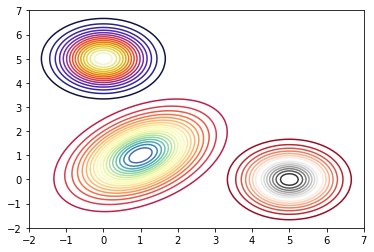

In [10]:
data_points = []
NUM_GAUSSIANS = 3
NUM_DIMENSION = 2
np.random.seed(1)
x = np.linspace(-2, 7, 100)
y = np.linspace(-2, 7, 100)

X, Y = np.meshgrid(x, y)
ind = np.empty(X.shape + (NUM_DIMENSION,))
ind[:,:,0]= X
ind[:,:,1]= Y

means = np.random.rand(NUM_GAUSSIANS,NUM_DIMENSION) + [[-1],[5],[2]]

random_covariance_vector = np.random.rand(NUM_DIMENSION) * [[1],[1.5],[2]]
covariance = np.empty((NUM_GAUSSIANS,NUM_DIMENSION,NUM_DIMENSION))

means = np.array([
    [5, 0],
    [1, 1],
    [0, 5]
])

covariance = np.array([
    [[.5, 0.], [0, .5]],
    [[.92, .38], [.38, .92]],
    [[.5, 0.], [0, .5]]
])

cmap = ['RdGy', 'Spectral', 'CMRmap']
print('_______________ MEANS ___________________')
print(means)
print('_______________ COVARIANCE ___________________')
for i in range(NUM_GAUSSIANS):
  print(covariance[i])
  Z = multivariate_normal(means[i], covariance[i])
  data_points.append(Z.rvs(100))
  plt.contour(X, Y, Z.pdf(ind), 20, cmap=cmap[i])



In [0]:
def symmetrize(a):
  return a + a.T - np.diag(a.diagonal())

a = np.array([[2,3],[4,5]])
symmetrize(a)

a / [2,1]


array([[1., 3.],
       [2., 5.]])

In [13]:
mutlivariate_data_points = np.concatenate((data_points[0], data_points[1], data_points[2]))
mutlivariate_data_points.shape

(250, 1)

# GMM for 2 dimension

In [0]:
'''

GMM Class with parameters as k weights(alpha), k mean(mu),k covarinace(sigma)
'''
class GMM:
  def __init__(self, num_gaussians, num_iterations):
    self.num_gaussians = num_gaussians
    self.num_iterations = num_iterations
    
    
  def Expectation_step(self):
    NUM_DATAPOINTS, NUM_GAUSSIANS = self.r.shape
    #calculate respossibility matrix r_ik
    for i in range(NUM_DATAPOINTS):
      for k in range(NUM_GAUSSIANS):
        self.r[i,k] =self.alpha[k] * multivariate_normal(self.mu[k], self.sigma[k]).pdf(self.datapoints[i])
      self.r[i,:] /= self.r[i,:].sum()

        
  def Minimiztion_step(self):
    n_k = self.r.sum(axis=0)
    self.alpha = n_k / self.datapoints.shape[0]
    
    mu_temp = np.dot(self.r.T, self.datapoints)
    self.mu = mu_temp / n_k[:, np.newaxis]
    
    for k in range(self.num_gaussians):
      sigma_diff = (self.datapoints - self.mu[i]).T
      self.sigma[k,:,:] = np.dot(self.r[:,k] * sigma_diff, sigma_diff.T) / n_k[k]
    
  def fit(self, data_points):
    np.random.seed(3)
    self.num_datapoints = len(data_points)
    self.datapoints = data_points
    
    self.r = np.zeros((self.num_datapoints, self.num_gaussians))
    self.alpha = [1/ self.num_gaussians] *  self.num_gaussians
    random_mu_index = np.random.choice(self.num_datapoints, self.num_gaussians, replace=False)
    self.mu = self.datapoints[random_mu_index]
    sigma_temp = np.cov(self.datapoints, rowvar=False)
    print(sigma_temp)
    digonal_ele = sigma_temp[0,0] if sigma_temp[0,0] > 0 else -sigma_temp[0,0]
    sigma_temp = np.diag([digonal_ele, digonal_ele])

    self.sigma = np.array([sigma_temp] * self.num_gaussians)
    
    print('initial values are', self.alpha)
    print(self.mu)
    print(self.sigma)
    
    for i in range(self.num_iterations):
      self.Expectation_step()
      self.Minimiztion_step()
    

In [32]:
model = GMM(3, 200)

model.fit(mutlivariate_data_points)
print('final values are')
print(model.alpha)
print(model.mu)
print(model.sigma)

[[ 5.53883428 -3.74315053]
 [-3.74315053  5.53590655]]
initial values are [0.3333333333333333, 0.3333333333333333, 0.3333333333333333]
[[ 6.78779625 -0.17581134]
 [ 0.57193933  6.26554767]
 [-0.33881523  5.24760557]]
[[[5.53883428 0.        ]
  [0.         5.53883428]]

 [[5.53883428 0.        ]
  [0.         5.53883428]]

 [[5.53883428 0.        ]
  [0.         5.53883428]]]
final values are
[0.42295603 0.44050734 0.13653663]
[[4.33627879 0.24155832]
 [0.2420799  4.1967417 ]
 [0.88572304 0.90285637]]
[[[14.91106331 -2.94912602]
  [-2.94912602  1.07250243]]

 [[ 1.06221858 -2.74506782]
  [-2.74506782 14.29000705]]

 [[ 0.94100809  0.75593813]
  [ 0.75593813  1.0317932 ]]]


In [24]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components = 3, covariance_type = 'full', 
                      max_iter = 1000)
gmm.fit(mutlivariate_data_points)
print(gmm.means_, gmm.covariances_)

# [[5 0]
#  [1 1]
#  [0 5]]
# _______________ COVARIANCE ___________________
# [[0.5 0. ]
#  [0.  0.5]]
# [[0.92 0.38]
#  [0.38 0.92]]
# [[0.5 0. ]
#  [0.  0.5]]

[[0.97391466 1.0289295 ]
 [5.12261772 0.05369403]
 [0.02933507 5.08411981]] [[[ 0.79309412  0.42250899]
  [ 0.42250899  0.98950959]]

 [[ 0.38547009 -0.10439964]
  [-0.10439964  0.50562204]]

 [[ 0.50847624 -0.06086655]
  [-0.06086655  0.63841654]]]


In [0]:
class EM:
    """
    Full covariance Gaussian Mixture Model,
    trained using Expectation Maximization
    """
    
    def __init__(self, n_components, n_iter, tol, seed):
        self.n_components = n_components
        self.n_iter = n_iter
        self.tol = tol
        self.seed = seed

    def fit(self, X):
        
        # data's dimensionality and responsibility vector
        self.n_row, self.n_col = X.shape     
        self.resp = np.zeros((self.n_row, self.n_components))
        
        # initialize parameters
        np.random.seed(self.seed)
        chosen = np.random.choice(self.n_row, self.n_components, replace = False)
        self.means = X[chosen]
        self.weights = np.full(self.n_components, 1 / self.n_components)
        
        # for np.cov, rowvar = False, 
        # indicates that the rows represents obervation
        shape = self.n_components, self.n_col, self.n_col
        self.covs = np.full(shape, np.cov(X, rowvar = False))
        
        log_likelihood = 0
        self.converged = False
        self.log_likelihood_trace = []      
        
        for i in range(self.n_iter):
            self._do_estep(X)
            self._do_mstep(X)
            log_likelihood_new = self._compute_log_likelihood(X)
           
            if (log_likelihood - log_likelihood_new) <= self.tol:
                self.converged = True
                break
                
            log_likelihood = log_likelihood_new
            self.log_likelihood_trace.append(log_likelihood)
            
        return self
      
    def _do_estep(self, X):
        """
        E-step: compute responsibilities,
        update resp matrix so that resp[j, k] is the responsibility of cluster k for data point j,
        to compute likelihood of seeing data point j given cluster k, use multivariate_normal.pdf
        """
        for k in range(self.n_components):
            prior = self.weights[k]
            likelihood = multivariate_normal(self.means[k], self.covs[k]).pdf(X)
            self.resp[:, k] = prior * likelihood
        
        # normalize over all possible cluster assignments
        self.resp = self.resp / self.resp.sum(axis = 1, keepdims = 1)
        return self
 
    def _do_mstep(self, X):
        """M-step, update parameters"""
        
        # total responsibility assigned to each cluster, N^{soft}
        resp_weights = self.resp.sum(axis = 0)
        
        # weights
        self.weights = resp_weights / self.n_row
        
        # means
        weighted_sum = np.dot(self.resp.T, X)
        self.means = weighted_sum / resp_weights.reshape(-1, 1)
        
        # covariance
        for k in range(self.n_components):
            diff = (X - self.means[k]).T
            weighted_sum = np.dot(self.resp[:, k] * diff, diff.T)
            self.covs[k] = weighted_sum / resp_weights[k]
            
        return self
    
    
    def _compute_log_likelihood(self, X):
        """manually compute the log likelihood of the current parameter"""
        log_likelihood = 0
        for k in range(self.n_components):
            
            weight = self.weights[k]
            mean = self.means[k]
            cov = self.covs[k]
            cov_inverse = np.linalg.inv(cov)
            term_other = np.log(2 * np.pi) + np.log(np.linalg.det(cov))
            
            for x in X:
                # compute (x-mu)^T * Sigma^{-1} * (x-mu)
                diff = x - mean
                term_exponent = np.dot(diff.T, np.dot(cov_inverse, diff))
            
                # compute loglikelihood contribution for this data point and this cluster             
                log_likelihood += -1 / 2 * (term_other + term_exponent) + np.log(weight)
            
        return log_likelihood

In [0]:
em = EM(n_components = 3, n_iter = 50, tol = 1e-4, seed = 4)
em.fit(mutlivariate_data_points)
print(em.weights)
print(em.means)
print(em.covs)

(60, 60, 2)
(60, 60)
(60, 60, 2)
(60, 60)


/usr/local/lib/python3.6/dist-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'zdir', 'offset'
  s)


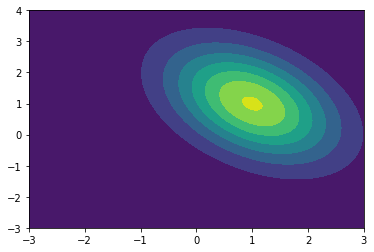

In [0]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D

# Our 2-dimensional distribution will be over variables X and Y
N = 60
X = np.linspace(-3, 3, N)
Y = np.linspace(-3, 4, N)
X, Y = np.meshgrid(X, Y)

# Mean vector and covariance matrix
mu = np.array([1., 1.])
Sigma = np.array([[ 1. , -0.5], [-0.5,  1.5]])

# Pack X and Y into a single 3-dimensional array
pos = np.empty(X.shape + (2,))
print(pos.shape)
pos[:, :, 0] = X
pos[:, :, 1] = Y
print(X.shape)
print(pos.shape)
def multivariate_gaussian(pos, mu, Sigma):
    """Return the multivariate Gaussian distribution on array pos.

    pos is an array constructed by packing the meshed arrays of variables
    x_1, x_2, x_3, ..., x_k into its _last_ dimension.

    """

    n = mu.shape[0]
    Sigma_det = np.linalg.det(Sigma)
    Sigma_inv = np.linalg.inv(Sigma)
    N = np.sqrt((2*np.pi)**n * Sigma_det)
    # This einsum call calculates (x-mu)T.Sigma-1.(x-mu) in a vectorized
    # way across all the input variables.
    fac = np.einsum('...k,kl,...l->...', pos-mu, Sigma_inv, pos-mu)
    return np.exp(-fac / 2) / N

# The distribution on the variables X, Y packed into pos.
Z = multivariate_gaussian(pos, mu, Sigma)
print(np.shape(Z))
# Create a surface plot and projected filled contour plot under it.
fig = plt.figure()
#ax = fig.gca(projection='3d')
#ax.plot_surface(X, Y, Z, rstride=3, cstride=3, linewidth=1, antialiased=True, cmap=cm.viridis)

cset = plt.contourf(X, Y, Z, zdir='z', offset=-0.15, cmap=cm.viridis)

# Adjust the limits, ticks and view angle
#ax.set_zlim(-0.15,0.2)
#ax.set_zticks(np.linspace(0,0.2,5))
ax.view_init(27, -21)

plt.show()

# KNN

In [0]:
from sklearn.neighbors import KNeighborsClassifier

In [17]:
y = [0] * 100 + [1] * 100 + [2] * 50
print(mutlivariate_data_points.shape)
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(mutlivariate_data_points, y) 
#print(neigh.predict(mutlivariate_data_points[:100]))
#print(neigh.predict(mutlivariate_data_points[100:200]))
#print(neigh.predict(mutlivariate_data_points[200:300]))

(250, 1)


KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')